Name: Daniel Masters ||
GitHub username: damasters ||
USC ID: 6203966352

<h1> DSCI 552 Homework #1 </h1>
<h2> 1. Vertebral Column Data Set</h2>
<p1> This Biomedical data set was built by Dr. Henrique da Mota during a medical residence
period in Lyon, France. Each patient in the data set is represented in the data set
by six biomechanical attributes derived from the shape and orientation of the pelvis
and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle,
sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is
used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and
Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0
and AB=1. </p1>

(a)
Download the Vertebral Column Data Set from:
https://archive.ics.uci.edu/ml/datasets/Vertebral+Column

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import inf
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
dat_file = '../data/vertebral_column_data/column_2C.dat'

In [3]:
f = open(dat_file, "r")

In [4]:
d = pd.read_table(dat_file, header= None, delimiter = "\s+")
d.columns = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis', 'class'] 
df = pd.DataFrame(data=d)
df['class'] = df['class'].replace('AB', 1)
df['class'] = df['class'].replace('NO', 0)
df.to_csv('DSCI_552_HW1_df.csv', index = False)

In [5]:
df_csv = pd.read_csv('DSCI_552_HW1_df.csv')

(b) Pre-Processing and Exploratory data analysis:
 i) Make scatterplots of the independent variables in the dataset. Use color to
    show Classes 0 and 1.

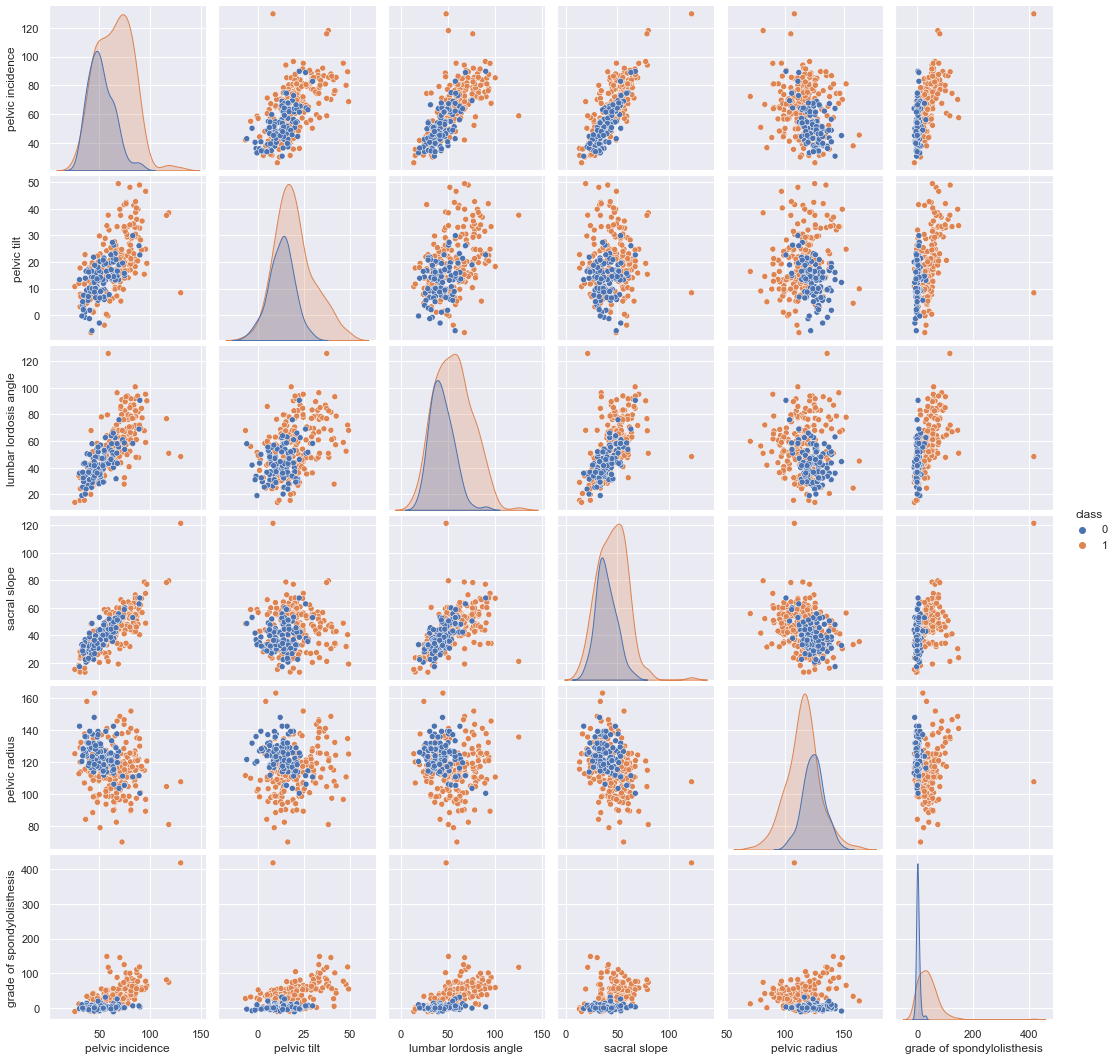

In [6]:
sns.set()
sns.pairplot(df_csv, hue= 'class', vars= ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis'])
plt.show()

b)ii) Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1 (see ISLR p. 129).

<AxesSubplot:xlabel='class', ylabel='pelvic incidence'>

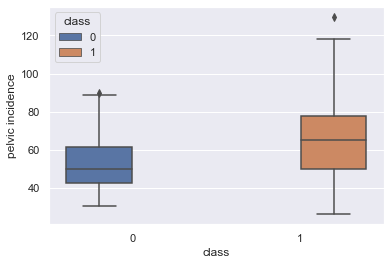

In [7]:
sns.boxplot(x= 'class', y= 'pelvic incidence', data= df_csv, hue= 'class')

<AxesSubplot:xlabel='class', ylabel='pelvic tilt'>

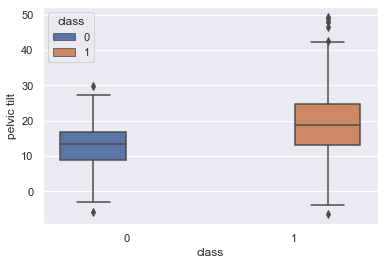

In [8]:
sns.boxplot(x= 'class', y= 'pelvic tilt', data= df_csv, hue= 'class')

<AxesSubplot:xlabel='class', ylabel='lumbar lordosis angle'>

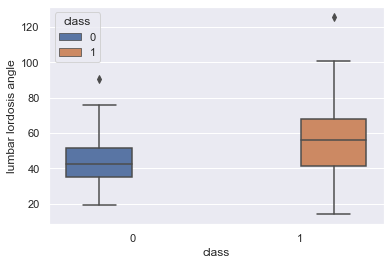

In [9]:
sns.boxplot(x= 'class', y= 'lumbar lordosis angle', data= df_csv, hue= 'class')

<AxesSubplot:xlabel='class', ylabel='sacral slope'>

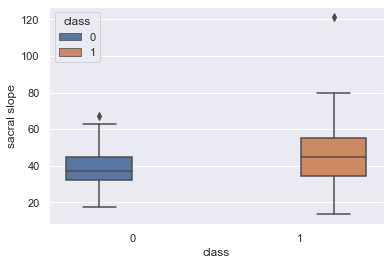

In [10]:
sns.boxplot(x= 'class', y= 'sacral slope', data= df_csv, hue= 'class')

<AxesSubplot:xlabel='class', ylabel='pelvic radius'>

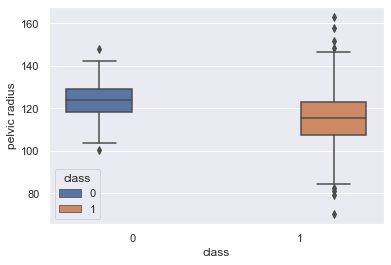

In [11]:
sns.boxplot(x= 'class', y= 'pelvic radius', data= df_csv, hue= 'class')

<AxesSubplot:xlabel='class', ylabel='grade of spondylolisthesis'>

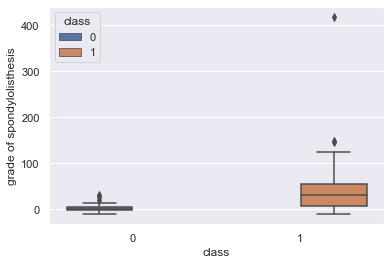

In [12]:
sns.boxplot(x= 'class', y= 'grade of spondylolisthesis', data= df_csv, hue= 'class')

b)iii)
Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set.


In [13]:
train_class_0 = df[df['class'] == 0].iloc[:70, :]
train_class_1 = df[df['class'] == 1].iloc[:140, :]
dfs = [train_class_0, train_class_1]
train_set = pd.concat(dfs)
train_set

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09,1
136,88.02,39.84,81.77,48.18,116.60,56.77,1
137,83.40,34.31,78.42,49.09,110.47,49.67,1
138,72.05,24.70,79.87,47.35,107.17,56.43,1


In [14]:
#training sets with and without labels to feed algorithms later
train_set_x = train_set.iloc[:, 0:6]
train_set_y = train_set.iloc[:, 6]

In [15]:
other_vals_0 = df[df['class'] == 0].iloc[70:, :]
other_vals_1 = df[df['class'] == 1].iloc[140:, :]
dfs_2 = [other_vals_0, other_vals_1]
test_set = pd.concat(dfs_2)
test_set

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class
280,50.09,13.43,34.46,36.66,119.13,3.09,0
281,64.26,14.50,43.90,49.76,115.39,5.95,0
282,53.68,13.45,41.58,40.24,113.91,2.74,0
283,49.00,13.11,51.87,35.88,126.40,0.54,0
284,59.17,14.56,43.20,44.60,121.04,2.83,0
...,...,...,...,...,...,...,...
205,80.11,33.94,85.10,46.17,125.59,100.29,1
206,95.48,46.55,59.00,48.93,96.68,77.28,1
207,74.09,18.82,76.03,55.27,128.41,73.39,1
208,87.68,20.37,93.82,67.31,120.94,76.73,1


In [16]:
#test sets with and without labels to feed algorithms later
test_set_x = test_set.iloc[:, :6]
test_set_y = test_set.iloc[:, 6]

(c) Classification using KNN on Vertebral Column Data Set

c)i) Write code for k-nearest neighbors with Euclidean metric (or use a software
package).

c)ii) Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F-score when k = k*.

In [17]:
acc_list = {}
for k in range(208, 0, -1):
    knn = KNeighborsClassifier(n_neighbors = k) #210 training points
    knn.fit(train_set_x, train_set_y)    #fit to training data
    pred_k = knn.predict(test_set_x)     #prediction with test data
    pred_acc = accuracy_score(test_set_y, pred_k)*100
    acc_list[k] = pred_acc
best_k = max(acc_list, key= acc_list.get)
best_acc = max(acc_list.values())
print("The most suitable K is:",str(best_k),"\nIt's accuracy is: "+str(best_acc)+"%")
    

The most suitable K is: 4 
It's accuracy is: 94.0%


In [18]:
#creating a confusion matrix with k=4
knn_4= KNeighborsClassifier(n_neighbors= 4)
knn_4.fit(train_set_x, train_set_y)
pred_k_4= knn_4.predict(test_set_x)
conf_matrix= confusion_matrix(test_set_y, pred_k_4)
print("Confusion Matrix calculation:\n"+str(conf_matrix))

Confusion Matrix calculation:
[[25  5]
 [ 1 69]]


In [35]:
#getting the precision, recall, f1-score
print(classification_report(test_set_y, pred_k_4))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



In [20]:
#calculating true positive rate = TP/TP+FN
tp = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[1,0])
tp_percent = tp*100
print("The true positive rate is: "+str(tp)+" or "+str(tp_percent)+"%")

The true positive rate is: 0.9857142857142858 or 98.57142857142858%


In [21]:
#calculating true negative rate = TN/FP+TN
tn = conf_matrix[0,0] / (conf_matrix[0,1] + conf_matrix[0,0])
tn_percent = tn*100
print("The true negative rate is: "+str(tn)+" or "+str(tn_percent)+"%")

The true negative rate is: 0.8333333333333334 or 83.33333333333334%


In [22]:
#calculating the precision = TP/TP+FP
precision = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[0,1])
prec_percent = precision*100
print("The precision is: "+str(precision)+" or "+str(prec_percent)+"%")

The precision is: 0.9324324324324325 or 93.24324324324324%


In [23]:
#calculating the F1-score = TP / (TP + .5(FP + FN))
f1_score = conf_matrix[1,1] / (conf_matrix[1,1] + .5*(conf_matrix[0,1] + conf_matrix[1,0]))
print("The f1-score is: "+str(f1_score))

The f1-score is: 0.9583333333333334


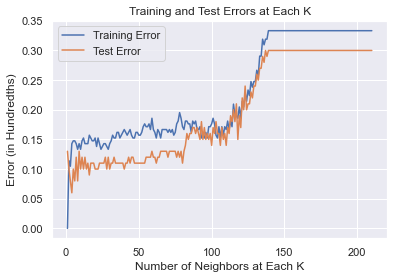

In [24]:
#plotting train and test errors of k
x_axis = []
tr_error_list = []
te_error_list = []
for k in range(210, 0, -1):
    x_axis.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_set_x, train_set_y)
    pred_train = knn.predict(train_set_x)
    pred_test = knn.predict(test_set_x)
    training_error = (1 - accuracy_score(train_set_y, pred_train))
    tr_error_list.append(training_error)
    test_error = (1 - accuracy_score(test_set_y, pred_test))
    te_error_list.append(test_error)
plt.plot(x_axis, tr_error_list, label = "Training Error")
plt.plot(x_axis, te_error_list, label = "Test Error")
plt.title("Training and Test Errors at Each K")
plt.xlabel("Number of Neighbors at Each K")
plt.ylabel("Error (in Hundredths)")
plt.legend()
plt.show()

c)iii) Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}. Note: for each N, select your training set by choosing the ﬁrst N/3 rows of Class 0 and the ﬁrst N − N/3 rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

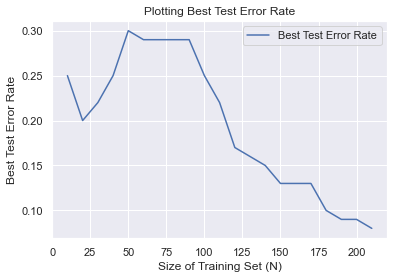

In [25]:
n_list = []
best_error_list = []
for n in range(10, 211, 10):
    n_list.append(n)
    calc_0= math.floor(n/3)
    calc_1= n - (math.floor(n/3))
    train_class_0_sub= train_class_0.iloc[:calc_0]
    train_class_1_sub= train_class_1.iloc[:calc_1]
    combined= pd.concat([train_class_0_sub, train_class_1_sub])
    new_train_x= combined.iloc[:, 0:6]
    new_train_y= combined.iloc[:, 6]
    optimal_k = []
    for k in range(1, n, 5):
        knn_k= KNeighborsClassifier(n_neighbors= k)
        knn_k.fit(new_train_x, new_train_y)
        new_pred= knn_k.predict(test_set_x)
        new_acc= accuracy_score(test_set_y, new_pred)
        error_rate= 1-new_acc
        optimal_k.append(error_rate)
    best_error= min(optimal_k)
    best_error_list.append(best_error)
plt.plot(n_list, best_error_list, label="Best Test Error Rate")
plt.title("Plotting Best Test Error Rate")
plt.xlabel("Size of Training Set (N)")
plt.ylabel("Best Test Error Rate")
plt.legend()
plt.show()

(d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.

d)i) Minkowski Distance:
    A. which becomes Manhattan Distance with p= 1.

In [26]:
error_dict = {}
for k in range(1, 197, 5):
    knn = KNeighborsClassifier(n_neighbors= k, p= 1) #210 training points
    knn.fit(train_set_x, train_set_y)    #fit to training data
    pred_k = knn.predict(test_set_x)     #prediction with test data
    pred_acc = accuracy_score(test_set_y, pred_k)
    pred_error= 1-pred_acc
    error_dict[k] = pred_error
k_best = min(error_dict, key= error_dict.get)
best_error_rate = min(error_dict.values())
print("The best K is:",str(k_best),"\nIt's best error rate is: "+str(best_error_rate)+".")


The best K is: 6 
It's best error rate is: 0.10999999999999999.


d)i)B) with log(10)(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log(10)(p)?

In [27]:
knn_6_errdict={}
for p in np.arange(0.1, 1.1, 0.1):
    knn_6= KNeighborsClassifier(n_neighbors= 6, p= pow(10,p))
    knn_6.fit(train_set_x, train_set_y)
    knn_6_predict= knn_6.predict(test_set_x)
    knn_6_acc= accuracy_score(test_set_y, knn_6_predict)
    knn_6_error= 1-knn_6_acc
    knn_6_errdict[p] = knn_6_error
best_p = min(knn_6_errdict, key= knn_6_errdict.get)
knn_6_best = min(knn_6_errdict.values())
print("The best log10(p) is:",str(best_p),"\nIt's best error rate is: "+str(knn_6_best)+".")

The best log10(p) is: 0.6 
It's best error rate is: 0.06000000000000005.


d)i)C) which becomes Chebyshev Distance with p→ ∞

In [28]:
knn_errdict = {}
for i in range(1, 197, 5):
    knn= KNeighborsClassifier(n_neighbors= i, metric= 'chebyshev')
    knn.fit(train_set_x, train_set_y)
    knn_predict= knn.predict(test_set_x)
    knn_acc= accuracy_score(test_set_y, knn_predict)
    knn_error= 1-knn_acc
    knn_errdict[i] = knn_error
best_cheby_err = min(knn_errdict.values())
mult_k = []
for k, v in knn_errdict.items():
    if v == best_cheby_err:
        mult_k.append(k)
best_cheby_k = max(mult_k)
print("The best k is:",str(best_cheby_k),"\nIt's best error rate is: "+str(best_cheby_err)+".")

The best k is: 16 
It's best error rate is: 0.07999999999999996.


d)ii) Mahalanobis Distance.

In [29]:
from sklearn.neighbors import DistanceMetric

In [30]:
knn_errdict= {}
cov_train= train_set_x.cov()
pseudo_inv= np.linalg.pinv(cov_train)
for i in range(1, 197, 5):
    knn= KNeighborsClassifier(n_neighbors= i, metric= 'mahalanobis', metric_params= {'VI': pseudo_inv})
    knn.fit(train_set_x, train_set_y)
    knn_predict= knn.predict(test_set_x)
    knn_acc= accuracy_score(test_set_y, knn_predict)
    knn_error= 1-knn_acc
    knn_errdict[i] = knn_error
best_mahala_err = min(knn_errdict.values())
many_k = []
for k, v in knn_errdict.items():
    if v == best_mahala_err:
        many_k.append(k)
best_mahala_k = max(many_k)
print("The best k is:",str(best_mahala_k),"\nIt's best error rate is: "+str(best_mahala_err)+".")

The best k is: 6 
It's best error rate is: 0.17000000000000004.


In [31]:
table_format = {'Distance Measurements':['Manhattan Distance (p=1)', 'log10(p)', 'Chebyshev Distance', 'Mahalanobis'], 'Best K (or P)':[k_best, best_p, best_cheby_k, best_mahala_k], 'Best Test Error': [best_error_rate, knn_6_best, best_cheby_err, best_mahala_err]}
table = pd.DataFrame(table_format)
table

,Distance Measurements,Best K (or P),Best Test Error
0,Manhattan Distance (p=1),6.0,0.11
1,log10(p),0.6,0.06
2,Chebyshev Distance,16.0,0.08
3,Mahalanobis,6.0,0.17


(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater inﬂuence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

In [32]:
euclid_dict= {}
for i in range(1, 197, 5):
    knn= KNeighborsClassifier(n_neighbors= i, weights= 'distance') #Euclidean Distance
    knn.fit(train_set_x, train_set_y)
    knn_predict= knn.predict(test_set_x)
    knn_acc= accuracy_score(test_set_y, knn_predict)
    knn_error= 1-knn_acc
    euclid_dict[i]= knn_error
best_euclid_err = min(euclid_dict.values())
mult_k = []
for k, v in euclid_dict.items():
    if v == best_euclid_err:
        mult_k.append(k)
best_euclid_k= max(mult_k)
print("The best k is:",str(best_euclid_k),"\nIt's best error rate is: "+str(best_euclid_err)+".")

The best k is: 6 
It's best error rate is: 0.09999999999999998.


In [33]:
manha_dict= {}
for i in range(1, 197, 5):
    knn_2= KNeighborsClassifier(n_neighbors= i, weights= 'distance', p=1) #Manhattan Distance
    knn_2.fit(train_set_x, train_set_y)
    knn_2_predict= knn_2.predict(test_set_x)
    knn_2_acc= accuracy_score(test_set_y, knn_2_predict)
    knn_2_error= 1-knn_2_acc
    manha_dict[i] = knn_2_error
best_manha_err = min(manha_dict.values()) 
mult_k = []
for k, v in manha_dict.items():
    if v == best_manha_err:
        mult_k.append(k)
best_manha_k= max(mult_k)
print("The best k is:",str(best_manha_k),"\nIt's best error rate is: "+str(best_manha_err)+".")

The best k is: 26 
It's best error rate is: 0.09999999999999998.


In [34]:
cheb_dict= {}
for i in range(1, 197, 5):
    knn_3= KNeighborsClassifier(n_neighbors= i, metric= 'chebyshev', weights= 'distance') #Chebyshev Distance
    knn_3.fit(train_set_x, train_set_y)
    knn_3_predict= knn_3.predict(test_set_x)
    knn_3_acc= accuracy_score(test_set_y, knn_3_predict)
    knn_3_error= 1-knn_3_acc
    cheb_dict[i] = knn_3_error
best_cheb_err = min(cheb_dict.values()) 
mult_k = []
for k, v in cheb_dict.items():
    if v == best_cheb_err:
        mult_k.append(k)
best_cheb_k= max(mult_k)
print("The best k is:",str(best_cheb_k),"\nIt's best error rate is: "+str(best_cheb_err)+".")

The best k is: 61 
It's best error rate is: 0.10999999999999999.


(f) What is the lowest training error rate you achieved in this homework?

0, because when k= 1 the closest training sample is itself.  